In [41]:
import numpy as np
import pandas as pd

In [42]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv")
submission = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_49d68Cx.csv")

In [43]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [44]:
train.shape

(614, 13)

In [45]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [46]:
test.shape

(367, 12)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [48]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [50]:
data = pd.concat([train,test],axis = 0)

In [51]:
data.shape

(981, 13)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [53]:
data.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [54]:
data.Gender.value_counts(normalize = True)*100

Male      80.982236
Female    19.017764
Name: Gender, dtype: float64

In [55]:
data.Married.value_counts(normalize = True)*100

Yes    64.519427
No     35.480573
Name: Married, dtype: float64

In [56]:
#finding no of records with credit history respective to the area
pd.crosstab(data['Credit_History'],data['Property_Area'])

Property_Area,Rural,Semiurban,Urban
Credit_History,,,
0.0,48,51,49
1.0,220,271,263


In [57]:
data.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [58]:
#finding loan duration 
#data['duration(yr)'] = (data['LoanAmount'] * 1000) / (data['Loan_Amount_Term'])
#data['duration(yr)'] = data['duration(yr)']/12

In [59]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
##Imputing the missing values

In [61]:
#Gender
	
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [62]:
#Married
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [63]:
#Dependents
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [64]:
#Self_Employed
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

<ipython-input-65-2779095db573>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data.LoanAmount, label = 'LOAN AMOUNT')


<Axes: xlabel='LoanAmount', ylabel='Density'>

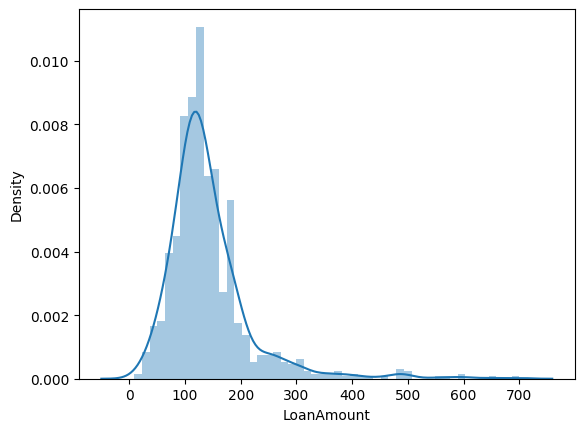

In [65]:
#LoanAmount
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.distplot(data.LoanAmount, label = 'LOAN AMOUNT')

In [66]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

<ipython-input-67-aace1d535281>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data.Loan_Amount_Term, label = 'LOAN AMOUNT Term')


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

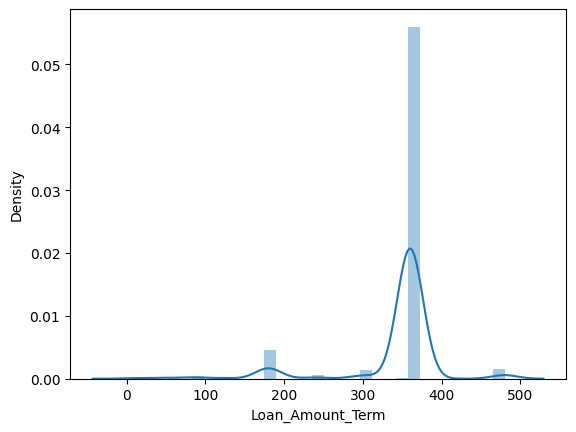

In [67]:
#Loan_Amount_Term
sn.distplot(data.Loan_Amount_Term, label = 'LOAN AMOUNT Term')

In [68]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [69]:
#Credit_History
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [70]:
#Loan_Status
data['Loan_Status'] = data['Loan_Status'] .map({'N':0,'Y':1})

In [71]:
#Removing Loan ID
data.drop(['Loan_ID'],axis=1,inplace=True)

In [72]:
#Encoding
X_features = list (data.columns)
X_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [73]:
encoded_data = pd.get_dummies(data[X_features],drop_first = True)
list(encoded_data.columns)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [74]:
train_df = encoded_data.loc[encoded_data['Loan_Status'].isna()==False]
test_df = encoded_data.loc[encoded_data['Loan_Status'].isna()==True]

In [75]:
train_df.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [76]:
import statsmodels.api as sm

Y = train_df['Loan_Status']
encoded_data1 = train_df.drop(['Loan_Status'],axis = 1)
X= sm.add_constant(encoded_data1)

In [77]:
#Splitting dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,Y, test_size = 0.3, random_state = 42)

In [78]:
#Building logistic regression model
import statsmodels.api as sm
logit = sm.Logit(y_train,X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.435301
         Iterations 7


In [80]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.283     
Dependent Variable:   Loan_Status        AIC:                403.4883  
Date:                 2023-04-14 11:19   BIC:                464.4101  
No. Observations:     429                Log-Likelihood:     -186.74   
Df Model:             14                 LL-Null:            -260.60   
Df Residuals:         414                LLR p-value:        2.0527e-24
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   -3.3839   0.9672 -3.4986 0.0005 -5.2797 -1.4882
ApplicantIncome         -0.0000   0.0000 -0.5476 0.5840 -0.0001  0.0000
CoapplicantIncome       -0.0000   0.0000 -0.5119 0.6087 -0.0001  0.0001
LoanAmount              -0.0005   0.0020 -0.2533 0.8000 -0.0044  0.0034
Loan_Amount_Term         0.0012   0.0019  0.5998 0.5486 -0.0026  0.0049
Credit_History           3.9783   0.5086  7.8225 0.0000  2.9815  4.9751
Gender_Male             -0.2429   0.3640 -0.6673 0.5046 -0.9562  0.4705
Married_Yes              0.7023   0.3035  2.3140 0.0207  0.1075  1.2972
Dependents_1            -0.4873   0.3609 -1.3503 0.1769 -1.1945  0.2200
Dependents_2             0.2993   0.4328  0.6917 0.4892 -0.5489  1.1476
Dependents_3+            0.9093   0.6063  1.4997 0.1337 -0.2791  2.0978
Education_Not Graduate  -0.2248   0.3162 -0.7109 0.4771 -0.8444  0.3949
Self_Employed_Yes        0.0602   0.4017  0.1499 0.8808 -0.7271  0.8475
Property_Area_Semiurban  1.1175   0.3427  3.2610 0.0011  0.4458  1.7891
Property_Area_Urban      0.2549   0.3186  0.8001 0.4237 -0.3696  0.8795
=======================================================================

"""

In [81]:
def get_significant_vars(lm):
  #To store the p-values and corresponding column names in a dataframe
  var_p_vals_df = pd.DataFrame(lm.pvalues)
  var_p_vals_df['vars'] = var_p_vals_df.index
  var_p_vals_df.columns = ['pvals','vars']
  #Filtering column names where pvalue is less than 0.05
  return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [82]:
significant_vars = get_significant_vars(logit_model)
significant_vars

['const', 'Credit_History', 'Married_Yes', 'Property_Area_Semiurban']

In [83]:
final_logit = sm.Logit(y_train,sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.444841
         Iterations 6


In [84]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.268     
Dependent Variable:   Loan_Status        AIC:                389.6740  
Date:                 2023-04-14 11:29   BIC:                405.9198  
No. Observations:     429                Log-Likelihood:     -190.84   
Df Model:             3                  LL-Null:            -260.60   
Df Residuals:         425                LLR p-value:        4.7621e-30
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   -3.1255   0.5221 -5.9869 0.0000 -4.1488 -2.1023
Credit_History           3.8506   0.4938  7.7981 0.0000  2.8828  4.8184
Married_Yes              0.6192   0.2619  2.3645 0.0181  0.1059  1.1325
Property_Area_Semiurban  0.9743   0.2892  3.3695 0.0008  0.4076  1.5411
=======================================================================

"""

In [86]:
y_pred_df = pd.DataFrame({"actual":y_test,"predicted_prob":final_logit.predict(sm.add_constant(X_test[significant_vars]))})

In [87]:
y_pred_df.sample(10,random_state = 42)

,actual,predicted_prob
182,1.0,0.910405
319,0.0,0.793187
68,1.0,0.793187
66,0.0,0.042066
598,1.0,0.793187
363,1.0,0.793187
509,1.0,0.673710
257,0.0,0.793187
118,0.0,0.793187
181,0.0,0.673710


In [88]:
y_pred_df['predicted']=y_pred_df.predicted_prob.map(lambda x: 1 if x>0.5 else 0)
y_pred_df.sample(10,random_state = 42)

,actual,predicted_prob,predicted
182,1.0,0.910405,1
319,0.0,0.793187,1
68,1.0,0.793187,1
66,0.0,0.042066,0
598,1.0,0.793187,1
363,1.0,0.793187,1
509,1.0,0.673710,1
257,0.0,0.793187,1
118,0.0,0.793187,1
181,0.0,0.673710,1


In [89]:
#confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [100]:
from sklearn import metrics
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted,labels = [1,0])
  sn.heatmap(cm, annot = True, fmt='.2f',xticklabels = ["Loan_Status_Y","Loan_Status_N"], yticklabels = ["Loan_Status_Y","Loan_Status_N"])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

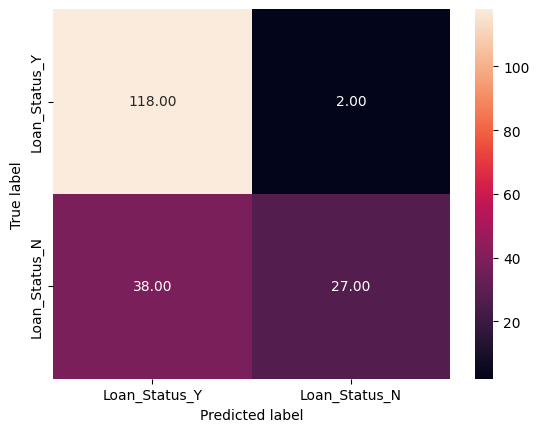

In [101]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [102]:
print(metrics.classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

         0.0       0.93      0.42      0.57        65
         1.0       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

